# EDA

In [111]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

# load data and basic check
df = pd.read_csv('predictive_maintenance.csv')
print (df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date       124494 non-null object
device     124494 non-null object
failure    124494 non-null int64
metric1    124494 non-null int64
metric2    124494 non-null int64
metric3    124494 non-null int64
metric4    124494 non-null int64
metric5    124494 non-null int64
metric6    124494 non-null int64
metric7    124494 non-null int64
metric8    124494 non-null int64
metric9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB
None


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


## Unique Count

In [112]:
print ('column unique_count ratio_of_unique')
for col in df.columns:
    print (col,df[col].nunique(),df[col].nunique()/df.shape[0])

column unique_count ratio_of_unique
date 304 0.0024418847494658375
device 1169 0.009390010763570935
failure 2 1.6065031246485775e-05
metric1 123877 0.9950439378604592
metric2 558 0.004482143717769531
metric3 47 0.0003775282342924157
metric4 115 0.000923739296672932
metric5 60 0.00048195093739457324
metric6 44838 0.36016193551496456
metric7 28 0.00022491043745080083
metric8 28 0.00022491043745080083
metric9 65 0.0005221135155107876


```We can know there is one target(failure),one datetime type(date), categorial type(device,metric2,metric3,metric4,metric5,metric7,metric8,metric9),high cardinality or numerical type(metric1,metric6) ```

## Target

In [113]:
print ('Negative Sample',df[df['failure']==0]['failure'].count())
print ('Positive Sample',df[df['failure']==1]['failure'].count())
print ('Negative Positive Ratio',df[df['failure']==0]['failure'].count()/df[df['failure']==1]['failure'].count())

Negative Sample 124388
Positive Sample 106
Negative Positive Ratio 1173.4716981132076


```very imbalance sample```

## Date

In [114]:
# extract month week day from date
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['weekofyear'] = df['date'].dt.weekofyear
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['weekend'] = (df['date'].dt.weekday >=5).astype(int)

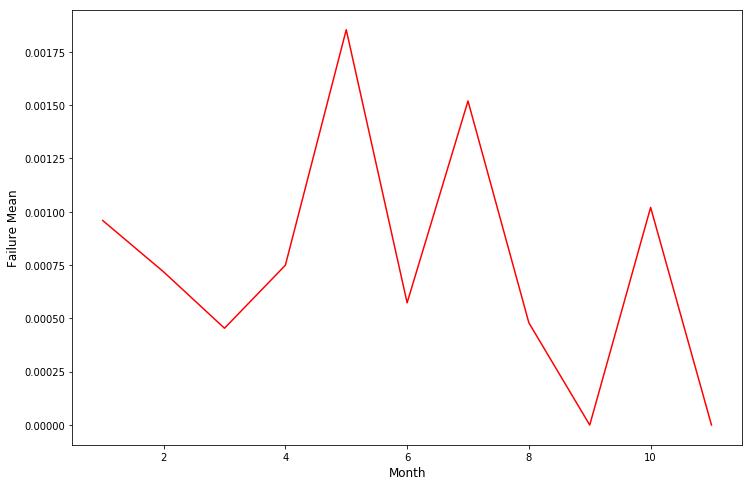

In [115]:
plt.figure(figsize=(12,8))
plt.plot(df.groupby(['month'])['failure'].mean(), c="red")
plt.xlabel('Month', fontsize=12)
plt.ylabel('Failure Mean', fontsize=12)
plt.show()

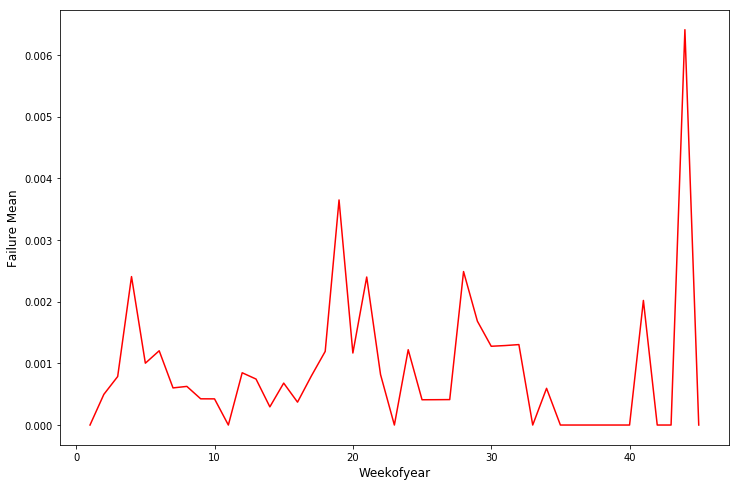

In [116]:
plt.figure(figsize=(12,8))
plt.plot(df.groupby(['weekofyear'])['failure'].mean(), c="red")
plt.xlabel('Weekofyear', fontsize=12)
plt.ylabel('Failure Mean', fontsize=12)
plt.show()

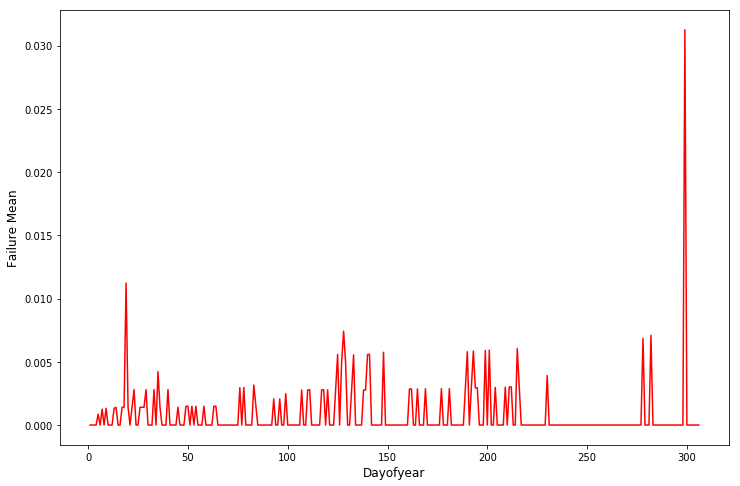

In [117]:
plt.figure(figsize=(12,8))
plt.plot(df.groupby(['dayofyear'])['failure'].mean(), c="red")
plt.xlabel('Dayofyear', fontsize=12)
plt.ylabel('Failure Mean', fontsize=12)
plt.show()

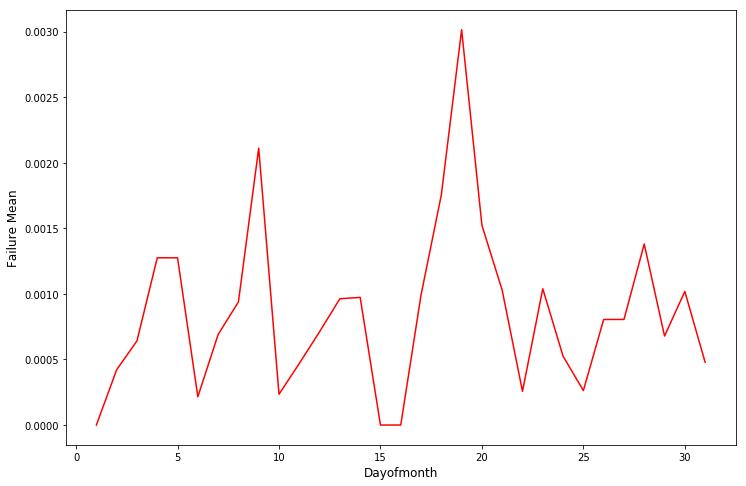

In [118]:
plt.figure(figsize=(12,8))
plt.plot(df.groupby(['dayofmonth'])['failure'].mean(), c="red")
plt.xlabel('Dayofmonth', fontsize=12)
plt.ylabel('Failure Mean', fontsize=12)
plt.show()

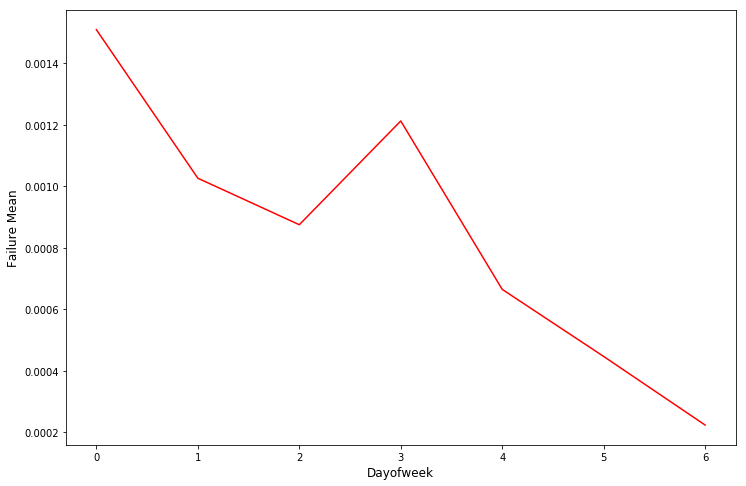

In [119]:
plt.figure(figsize=(12,8))
plt.plot(df.groupby(['dayofweek'])['failure'].mean(), c="red")
plt.xlabel('Dayofweek', fontsize=12)
plt.ylabel('Failure Mean', fontsize=12)
plt.show()

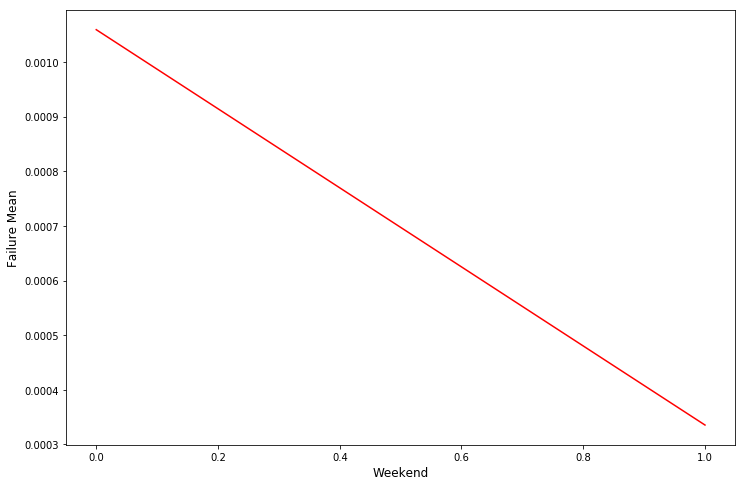

In [120]:
plt.figure(figsize=(12,8))
plt.plot(df.groupby(['weekend'])['failure'].mean(), c="red")
plt.xlabel('Weekend', fontsize=12)
plt.ylabel('Failure Mean', fontsize=12)
plt.show()

```seems different date has different target distribution,date features maybe related to failure```

## device

In [121]:
df['device'].value_counts().sort_values(ascending=False)

Z1F0KJDS    304
S1F0KYCR    304
S1F0FGBQ    304
S1F0E9EP    304
W1F0G9T7    304
W1F0SJJ2    304
W1F0JH87    304
Z1F0QK05    304
Z1F0Q8RT    304
S1F0GGPP    304
W1F0FY92    304
Z1F0MA1S    304
Z1F0QLC1    304
W1F0JXDL    304
W1F0JY02    304
S1F0FP0C    304
Z1F0GE1M    304
W1F05X69    304
S1F0GPXY    304
S1F0H6JG    304
Z1F0QL3N    304
S1F0GCED    304
Z1F0GB8A    304
W1F0FZPA    304
Z1F0KKN4    304
W1F0FEH7    304
S1F0EGMT    304
W1F0T0B1    299
Z1F18YB3    295
Z1F11SYE    295
           ... 
S1F0B3XA      5
W1F1N4CT      5
Z1F0L4J2      5
S1F0LHH2      5
S1F0CTRL      5
Z1F14F5V      5
W1F11FCC      5
S1F114QR      5
Z1F0LT6P      5
Z1F1632F      5
Z1F0LQMH      5
S1F0CVDS      5
S1F05P5Z      5
S1F0CVY5      5
Z1F0L7NS      5
S1F0CSRZ      5
S1F0LCSV      5
S1F13BQX      5
Z1F0LR8G      5
S1F0B5QJ      5
S1F10QH3      5
S1F0RRB1      5
S1F0LDLW      5
Z1F1AGLA      5
W1F1ARYY      5
S1F0A1PX      5
Z1F1AGN5      5
S1F04KSC      4
W1F0WJFT      3
W1F1DA5ÿ      1
Name: device, Length: 11

In [122]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['device'] = lbl.fit_transform(df['device'].astype(str))

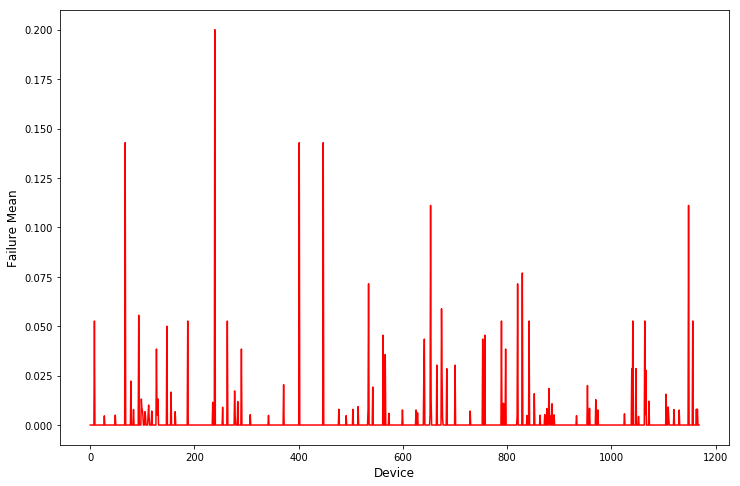

In [123]:
plt.figure(figsize=(12,8))
plt.plot(df.groupby(['device'])['failure'].mean(), c="red")
plt.xlabel('Device', fontsize=12)
plt.ylabel('Failure Mean', fontsize=12)
plt.show()

```transform device by labelencoder as categorial feature```

# Build a baseline logistic regression

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold
from sklearn.metrics import accuracy_score,log_loss,roc_auc_score

# Feature Selection
drop_features=['date','failure','prediction']
feats = [f for f in df.columns if f not in drop_features]
print ('features:',feats)

# StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4590)
oof_preds_hard = np.zeros(df.shape[0])
oof_preds_soft = np.zeros(df.shape[0])
cv_list = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df, df['failure'])):
    print ('Fold:',n_fold)
    train_x, train_y = df[feats].iloc[train_idx], df['failure'].iloc[train_idx]
    valid_x, valid_y = df[feats].iloc[valid_idx], df['failure'].iloc[valid_idx] 
    
    # StandardScaler
    scaler = StandardScaler()
    train_x = scaler.fit_transform(train_x)
    valid_x = scaler.transform(valid_x)

    clf = LogisticRegression()
    clf.fit(train_x, train_y)
    
    oof_preds_hard[valid_idx] = clf.predict(valid_x)
    oof_preds_soft[valid_idx] = clf.predict_proba(valid_x)[:,-1]
    
    acc_cv = accuracy_score(valid_y,  oof_preds_hard[valid_idx])
    auc_cv = roc_auc_score(valid_y,  oof_preds_soft[valid_idx])
    logloss_cv = log_loss(valid_y,  oof_preds_soft[valid_idx])
    
    print ('accuracy:',acc_cv)
    print ('auc:',auc_cv)
    print ('logloss:',logloss_cv)
    
acc_cv = accuracy_score(df['failure'],  oof_preds_hard)
print('Total accuracy %.6f' % acc_cv)   
auc_cv = roc_auc_score(df['failure'],  oof_preds_soft)
print('Total auc %.6f' % auc_cv)  
logloss_cv = log_loss(df['failure'],  oof_preds_soft)
print('Total logloss %.6f' % logloss_cv)  

df['prediction'] = oof_preds

features: ['device', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'month', 'weekofyear', 'dayofyear', 'dayofmonth', 'dayofweek', 'weekend']
Fold: 0
accuracy: 0.9990763052208835
auc: 0.6772814973433994
logloss: 0.007017233931391498
Fold: 1
accuracy: 0.9991164303787301
auc: 0.7099962100766024
logloss: 0.006347023849506463
Fold: 2
accuracy: 0.9990762681232178
auc: 0.7302684720483579
logloss: 0.006534634482580178
Fold: 3
accuracy: 0.9991967226283236
auc: 0.7525348524263185
logloss: 0.006029125046414007
Fold: 4
accuracy: 0.9991163948911559
auc: 0.726168941669203
logloss: 0.006129392119230727
Total accuracy 0.999116
Total auc 0.716786
Total logloss 0.006411


```too many negative sample make accuraccy and logloss seems very good but meanless,auc is good metric for imbalanced data```

# Build a stronger baseline model with Lightgbm 

In [125]:
import lightgbm as lgb

# Feature Selection
drop_features=['date','failure','prediction',]
feats = [f for f in df.columns if f not in drop_features]
cat_features = []
print ('features:',feats)

# StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4590)
oof_preds = np.zeros(df.shape[0])
cv_list = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df, df['failure'])):
    train_x, train_y = df[feats].iloc[train_idx], df['failure'].iloc[train_idx]
    valid_x, valid_y = df[feats].iloc[valid_idx], df['failure'].iloc[valid_idx] 

    params = {
               "objective" : "binary", 
               "boosting" : "gbdt", 
               "metric" : "auc",  
               "learning_rate" : 0.1,
    }    
    
    dtrain = lgb.Dataset(
            train_x, label=train_y,categorical_feature=cat_features,)
    dval = lgb.Dataset(
            valid_x, label=valid_y, reference=dtrain,categorical_feature=cat_features,) 
    bst = lgb.train(
            params, dtrain, num_boost_round=1000,
            valid_sets=[dval,dtrain],early_stopping_rounds=200, verbose_eval=100,)
        
    new_list = sorted(zip(feats, bst.feature_importance('gain')),key=lambda x: x[1], reverse=True)[:]
    for item in new_list:
        print (item) 

    
    oof_preds[valid_idx] = bst.predict(valid_x, bst.best_iteration)
    oof_cv = roc_auc_score(valid_y,  oof_preds[valid_idx])
    cv_list.append(oof_cv)
    print (cv_list)
cv = roc_auc_score(df['failure'],  oof_preds)
print('Total AUC %.6f' % cv)     

df['prediction'] = oof_preds

features: ['device', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9', 'month', 'weekofyear', 'dayofyear', 'dayofmonth', 'dayofweek', 'weekend']
Training until validation scores don't improve for 200 rounds.


/Users/localadmin/.pyenv/versions/3.5.3/lib/python3.5/site-packages/lightgbm/basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[100]	training's auc: 1	valid_0's auc: 0.93768
[200]	training's auc: 1	valid_0's auc: 0.902111
Early stopping, best iteration is:
[83]	training's auc: 1	valid_0's auc: 0.938312
('metric4', 853.1539000123739)
('dayofyear', 694.150737375021)
('metric1', 649.1607018709183)
('metric6', 645.7923406288028)
('device', 566.6749799698591)
('metric2', 461.5703847184777)
('dayofmonth', 459.3982296511531)
('metric7', 445.4231492802501)
('dayofweek', 356.5677927285433)
('metric5', 205.89179815351963)
('weekofyear', 148.74918431043625)
('metric9', 86.03083521127701)
('month', 54.739123821258545)
('metric3', 14.754272058606148)
('weekend', 5.792500019073486)
('metric8', 0.0)
[0.9383116883116883]
Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 1	valid_0's auc: 0.92448
[200]	training's auc: 1	valid_0's auc: 0.956871
Early stopping, best iteration is:
[93]	training's auc: 1	valid_0's auc: 0.923917
('weekofyear', 15794.12381759286)
('metric6', 13537.843533568084)
('de

## Feature Engineering & Parameter tuning to improve auc

In [128]:
import lightgbm as lgb

# Feature Engineering
for cols1 in ['dayofyear','dayofmonth','dayofweek','weekofyear','month','device']:
    for cols2 in ['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric9']:
        df[cols1+ '_count_of_' + cols2] = df.groupby([cols1])[cols2].transform('count')
        df[cols1+ '_unique_of_' + cols2] = df.groupby([cols1])[cols2].transform('nunique')
        
# Feature Selection
drop_features=['date','failure','prediction','weekend','metric8']
feats = [f for f in df.columns if f not in drop_features]
cat_features = []
print ('features:',feats)

# StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4590)
oof_preds = np.zeros(df.shape[0])
cv_list = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df, df['failure'])):
    train_x, train_y = df[feats].iloc[train_idx], df['failure'].iloc[train_idx]
    valid_x, valid_y = df[feats].iloc[valid_idx], df['failure'].iloc[valid_idx] 

    params = {
               "objective" : "binary", 
               "boosting" : "gbdt", 
               "metric" : "auc",  
               "max_depth": 5,
               "min_data_in_leaf": 30, 
               "reg_alpha": 0.1, 
               "reg_lambda": 1, 
               "num_leaves" : 15, 
               "learning_rate" : 0.05,
               "bagging_fraction" : 0.8,
               "feature_fraction" : 0.8, 
               "scale_pos_weight": 1.5,
    }    
    
    dtrain = lgb.Dataset(
            train_x, label=train_y,categorical_feature=cat_features,)
    dval = lgb.Dataset(
            valid_x, label=valid_y, reference=dtrain,categorical_feature=cat_features,) 
    bst = lgb.train(
            params, dtrain, num_boost_round=1000,
            valid_sets=[dval,dtrain],early_stopping_rounds=100, verbose_eval=50,)
    
    oof_preds[valid_idx] = bst.predict(valid_x, bst.best_iteration)
    oof_cv = roc_auc_score(valid_y,  oof_preds[valid_idx])
    cv_list.append(oof_cv)
    print (cv_list)
cv = roc_auc_score(df['failure'],  oof_preds)
print('Total AUC %.6f' % cv)     

df['prediction'] = oof_preds

features: ['device', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric9', 'month', 'weekofyear', 'dayofyear', 'dayofmonth', 'dayofweek', 'dayofyear_count_of_metric1', 'dayofyear_unique_of_metric1', 'dayofyear_count_of_metric2', 'dayofyear_unique_of_metric2', 'dayofyear_count_of_metric3', 'dayofyear_unique_of_metric3', 'dayofyear_count_of_metric4', 'dayofyear_unique_of_metric4', 'dayofyear_count_of_metric5', 'dayofyear_unique_of_metric5', 'dayofyear_count_of_metric6', 'dayofyear_unique_of_metric6', 'dayofyear_count_of_metric7', 'dayofyear_unique_of_metric7', 'dayofyear_count_of_metric9', 'dayofyear_unique_of_metric9', 'dayofmonth_count_of_metric1', 'dayofmonth_unique_of_metric1', 'dayofmonth_count_of_metric2', 'dayofmonth_unique_of_metric2', 'dayofmonth_count_of_metric3', 'dayofmonth_unique_of_metric3', 'dayofmonth_count_of_metric4', 'dayofmonth_unique_of_metric4', 'dayofmonth_count_of_metric5', 'dayofmonth_unique_of_metric5', 'dayofmonth_count_of_metr

/Users/localadmin/.pyenv/versions/3.5.3/lib/python3.5/site-packages/lightgbm/basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.939073	valid_0's auc: 0.957036
[100]	training's auc: 0.979345	valid_0's auc: 0.971369
[150]	training's auc: 0.997995	valid_0's auc: 0.976944
[200]	training's auc: 0.99949	valid_0's auc: 0.9635
Early stopping, best iteration is:
[136]	training's auc: 0.996728	valid_0's auc: 0.978347
[0.978347060930066]
Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.888631	valid_0's auc: 0.874637
[100]	training's auc: 0.982387	valid_0's auc: 0.981356
[150]	training's auc: 0.997295	valid_0's auc: 0.988012
[200]	training's auc: 0.999252	valid_0's auc: 0.987237
[250]	training's auc: 0.999775	valid_0's auc: 0.989696
[300]	training's auc: 0.999954	valid_0's auc: 0.990075
[350]	training's auc: 0.999991	valid_0's auc: 0.990621
[400]	training's auc: 0.999999	valid_0's auc: 0.990418
[450]	training's auc: 1	valid_0's auc: 0.98962
Early stopping, best iteration is:
[374]	training's auc: 0.999